# What is machine learning?

In this section we will begin to explore the basic principles of machine learning.
Machine Learning is about building programs with **tunable parameters** (typically an
array of floating point values) that are adjusted automatically so as to improve
their behavior by **adapting to previously seen data.**

Machine Learning can be considered a subfield of **Artificial Intelligence** since those
algorithms can be seen as building blocks to make computers learn to behave more
intelligently by somehow **generalizing** rather that just storing and retrieving data items
like a database system would do.

We'll take a look at two very simple machine learning tasks here.
The first is a **classification** task: the figure shows a
collection of two-dimensional data, colored according to two different class
labels. A classification algorithm may be used to draw a dividing boundary
between the two clusters of points:

In [1]:
# Start matplotlib inline mode, so figures will appear in the notebook
%matplotlib inline

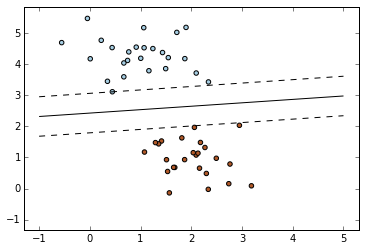

In [2]:
# Import the example plot from the figures directory
from figures import plot_sgd_separator
plot_sgd_separator()

This may seem like a trivial task, but it is a simple version of a very important concept.
By drawing this separating line, we have learned a model which can **generalize** to new
data: if you were to drop another point onto the plane which is unlabeled, this algorithm
could now **predict** whether it's a blue or a red point.

If you'd like to see the source code used to generate this, you can either open the
code in the `figures` directory, or you can load the code using the `%load` magic command:

In [ ]:
# %load figures/sgd_separator.py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets.samples_generator import make_blobs

def plot_sgd_separator():
    # we create 50 separable points
    X, Y = make_blobs(n_samples=50, centers=2,
                      random_state=0, cluster_std=0.60)

    # fit the model
    clf = SGDClassifier(loss="hinge", alpha=0.01,
                        n_iter=200, fit_intercept=True)
    clf.fit(X, Y)

    # plot the line, the points, and the nearest vectors to the plane
    xx = np.linspace(-1, 5, 10)
    yy = np.linspace(-1, 5, 10)

    X1, X2 = np.meshgrid(xx, yy)
    Z = np.empty(X1.shape)
    for (i, j), val in np.ndenumerate(X1):
        x1 = val
        x2 = X2[i, j]
        p = clf.decision_function([x1, x2])
        Z[i, j] = p[0]
    levels = [-1.0, 0.0, 1.0]
    linestyles = ['dashed', 'solid', 'dashed']
    colors = 'k'

    ax = plt.axes()
    ax.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

    ax.axis('tight')


if __name__ == '__main__':
    plot_sgd_separator()
    plt.show()


The next simple task we'll look at is a **regression** task: a simple best-fit line
to a set of data:

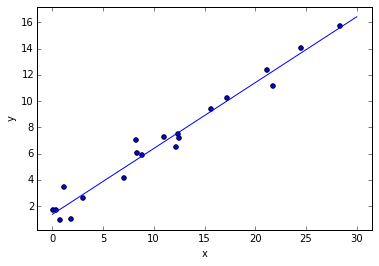

In [4]:
from figures import plot_linear_regression
plot_linear_regression()

Again, this is an example of fitting a model to data, such that the model can make
generalizations about new data.  The model has been **learned** from the training
data, and can be used to predict the result of test data:
here, we might be given an x-value, and the model would
allow us to predict the y value.  Again, this might seem like a trivial problem,
but it is a basic example of a type of operation that is fundamental to
machine learning tasks.

# An Overview of Scikit-learn

*Adapted from* [*http://scikit-learn.org/stable/tutorial/basic/tutorial.html*](http://scikit-learn.org/stable/tutorial/basic/tutorial.html)

In [5]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

## Loading an Example Dataset

In [6]:
from sklearn import datasets
digits = datasets.load_digits()

In [7]:
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [8]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [9]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

## Learning and Predicting

In [10]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

In [11]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

In [12]:
clf.predict(digits.data[-1])

array([8])

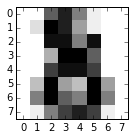

In [13]:
plt.figure(figsize=(2, 2))
plt.imshow(digits.images[-1], interpolation='nearest', cmap=plt.cm.binary)

In [14]:
print(digits.target[-1])

8
